In [3]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import warnings

from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')


matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)


In [4]:
#데이터 불러오기
data = pd.read_csv("SCALE불량.csv", encoding = 'euc-kr')
data

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [5]:
df=data[:]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

In [7]:
# plate_no, fur_ex_temp 제거 : 필요X
df=df.drop(columns=['plate_no','fur_ex_temp'] ,axis=1)

In [8]:
# rolling_temp = 0 / 이상치 제거
df[df['rolling_temp'] == 0]

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
53,03JAN2023:16:22:29,양품,GL-E36-TM,독일,T,56,3800,11400,적용,3호기,2열,1132,95,1128,80,244,TMCP(온도제어),0,6,1조
221,04JAN2023:19:44:09,양품,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,2열,1163,57,1166,67,228,CR(제어압연),0,10,2조
222,04JAN2023:19:56:39,양품,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,1열,1169,64,1164,61,188,CR(제어압연),0,10,2조
598,07JAN2023:11:40:51,양품,PILAC-BT33,한국,T,81,2100,12900,적용,2호기,1열,1133,89,1122,59,229,CR(제어압연),0,6,3조
599,07JAN2023:11:52:00,양품,PILAC-BT33,한국,T,81,2100,13200,적용,1호기,2열,1130,92,1124,61,210,CR(제어압연),0,6,3조
600,07JAN2023:11:59:10,양품,NV-D32-TM,영국,T,40,2500,23600,적용,3호기,1열,1119,109,1117,76,260,TMCP(온도제어),0,6,3조


In [9]:
# rolling_temp = 0 > 같은 Spec과 강종을 가진 rolling_temp의 평균치로 대체
# 221/222 동일 Spec/동일 강종
# 598/599 동일 Spec/동일 강종

GL_E36_TM_T = df[(df['spec_long']=='GL-E36-TM') & (df['steel_kind']=='T')]['rolling_temp'].mean()
JS_SM490YB_C = df[(df['spec_long']=='JS-SM490YB') & (df['steel_kind']=='C')]['rolling_temp'].mean()
PILAC_BT33_T = df[(df['spec_long']=='PILAC-BT33') & (df['steel_kind']=='T')]['rolling_temp'].mean()
NV_D32_TM_T = df[(df['spec_long']=='NV-D32-TM') & (df['steel_kind']=='T')]['rolling_temp'].mean()

df.loc[53, 'rolling_temp']=GL_E36_TM_T
df.loc[221, 'rolling_temp']=JS_SM490YB_C
df.loc[222, 'rolling_temp']=JS_SM490YB_C
df.loc[598, 'rolling_temp']=PILAC_BT33_T
df.loc[599, 'rolling_temp']=PILAC_BT33_T
df.loc[600, 'rolling_temp']=NV_D32_TM_T

In [10]:
df[df['rolling_temp'] == 0]

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group


In [11]:
# 변수 라벨링
# Day(07~18) / N(19~06)
df['rolling_date']=df['rolling_date'].str[10:12]
DN ={'07': 'D', '08': 'D', '09': 'D', '10': 'D', '11': 'D', '12': 'D', '13': 'D', '14': 'D', '15': 'D', '16': 'D', '17': 'D', '18': 'D',
      '19': 'N', '20': 'N', '21': 'N', '22': 'N', '23': 'N', '00': 'N', '01': 'N', '02': 'N', '03': 'N', '04': 'N', '05': 'N', '06': 'N'}
df['rolling_date'] = df['rolling_date'].map(DN)

In [12]:
# scale -> [0,1] / spec_country drop / hsb > [1,0] / rolling_method > [TC CR]
df['scale']=df['scale'].map({'양품':0, '불량':1})
df['hsb']=df['hsb'].map({'적용':0, '미적용':1})
df['rolling_method']=df['rolling_method'].map({'TMCP(온도제어)':'TC', 'CR(제어압연)':'CR'})
df=df.drop(columns='spec_country',axis=1)

In [13]:
# 파생변수 생성 1 : fur_total_time = fur_soak_time + fur_heat_time + fur_pre_time
df['fur_pre_time']=df['fur_total_time']-df['fur_soak_time']-df['fur_heat_time']
df=df.drop(columns='fur_total_time', axis=1)

In [14]:
# 파생변수 생성 2 : 면적으로 변환 및 단위 변환 (mm > m)
df['pt_area']=(0.001*df['pt_width'])*(0.001*df['pt_length'])

In [15]:
df=df.drop(columns=['spec_long','pt_length','pt_width','fur_no'])

In [16]:
df

,rolling_date,scale,steel_kind,pt_thick,hsb,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,rolling_method,rolling_temp,descaling_count,work_group,fur_pre_time,pt_area
0,D,0,T,32,0,1열,1144,116,1133,59,TC,934.0,8,1조,84,55.87
1,D,0,T,32,0,2열,1144,122,1135,53,TC,937.0,8,1조,63,55.87
2,D,0,T,33,0,1열,1129,116,1121,55,TC,889.0,8,1조,87,69.12
3,D,0,T,33,0,2열,1152,125,1127,68,TC,885.0,8,1조,73,69.12
4,D,0,T,38,0,1열,1140,134,1128,48,TC,873.0,8,1조,64,41.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,N,0,C,19,0,2열,1142,55,1151,86,CR,948.0,10,4조,62,141.10
996,N,0,C,19,0,2열,1142,55,1151,86,CR,948.0,10,4조,68,141.10
997,N,0,C,17,0,2열,1169,65,1163,77,CR,948.0,10,4조,85,148.58
998,N,0,C,17,0,2열,1169,65,1163,77,CR,948.0,10,4조,62,148.58


In [17]:
# 전처리 끝

In [18]:
# 강종 별 데이터 생성
df_Tsteel = df[(df['steel_kind'] == 'T')]
df_Csteel = df[(df['steel_kind'] == 'C')]

df_Tsteel=df_Tsteel.drop(columns='steel_kind',axis=1)
df_Csteel=df_Csteel.drop(columns='steel_kind',axis=1)

df_Tsteel.reset_index(drop=True, inplace=True)

df_Csteel.reset_index(drop=True, inplace=True)


# df_Tsteel.to_csv("df_Tsteel1.csv", index = False)
# df_Csteel.to_csv("df_Csteel1.csv", index = False)
# df.to_csv("df_TC1.csv", index = False)

In [19]:
# 모델링

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
# 로지스틱 회귀
from statsmodels.api import Logit

In [21]:
df_train_c, df_test_c = train_test_split(df_Csteel, test_size = 0.2, random_state = 5649)

In [22]:
df_train_t, df_test_t = train_test_split(df_Tsteel, test_size = 0.2, random_state = 5649)

In [23]:
# 로지스틱 회귀 : C steel
log_model_c = Logit.from_formula("""scale ~ C(rolling_date) + pt_thick + pt_area + hsb + C(fur_input_row) + fur_heat_temp + fur_heat_time + fur_soak_temp + fur_soak_time + C(rolling_method) + rolling_temp + descaling_count + C(work_group) + fur_pre_time""", df_Csteel)
log_model_c = log_model_c.fit()

print(log_model_c.summary())

         Current function value: 0.348677
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  755
Model:                          Logit   Df Residuals:                      740
Method:                           MLE   Df Model:                           14
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4765
Time:                        14:47:39   Log-Likelihood:                -263.25
converged:                      False   LL-Null:                       -502.86
Covariance Type:            nonrobust   LLR p-value:                 2.345e-93
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -90.4227     27.404     -3.300      0.001    -144.133     -36.712
C(rolling_date)[T.N]      -0.

In [24]:
y_pred_test = log_model_c.predict(df_test_c)

y_pred_test_class = (y_pred_test > 0.5).astype(int)

print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_c["scale"],y_pred_test_class)),"\n")

print("로지스틱(C steel) Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test_c["scale"], y_pred_test_class)))
print(classification_report(df_test_c["scale"], y_pred_test_class, digits=3))

Confusion Matrix: 
[[88 11]
 [15 37]] 

로지스틱(C steel) Test 예측/분류 결과
Accuracy: 0.828

              precision    recall  f1-score   support

           0      0.854     0.889     0.871        99
           1      0.771     0.712     0.740        52

    accuracy                          0.828       151
   macro avg      0.813     0.800     0.806       151
weighted avg      0.826     0.828     0.826       151



In [25]:
# 로지스틱 회귀 : T steel
log_model_t = Logit.from_formula("""scale ~ C(rolling_date) + pt_thick + pt_area + hsb + C(fur_input_row) + fur_heat_temp + fur_heat_time + fur_soak_temp + fur_soak_time + C(rolling_method) + rolling_temp + descaling_count + C(work_group) + fur_pre_time""", df_Tsteel)
log_model_t = log_model_t.fit()

print(log_model_t.summary())

         Current function value: 0.104115
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  245
Model:                          Logit   Df Residuals:                      230
Method:                           MLE   Df Model:                           14
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.6318
Time:                        14:47:40   Log-Likelihood:                -25.508
converged:                      False   LL-Null:                       -69.271
Covariance Type:            nonrobust   LLR p-value:                 1.111e-12
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  32.5617     80.543      0.404      0.686    -125.299     190.422
C(rolling_date)[T.N]      

In [26]:
y_pred_test = log_model_t.predict(df_test_t)

y_pred_test_class = (y_pred_test > 0.5).astype(int)

print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_t["scale"],y_pred_test_class)),"\n")
print("로지스틱(T steel)Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test_t["scale"], y_pred_test_class)))
print(classification_report(df_test_t["scale"], y_pred_test_class, digits=3))
print("로지스틱(T steel)Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test_t["scale"], y_pred_test_class)))
print(classification_report(df_test_t["scale"], y_pred_test_class, digits=3))

Confusion Matrix: 
[[45  0]
 [ 1  3]] 

로지스틱(T steel)Test 예측/분류 결과
Accuracy: 0.980

              precision    recall  f1-score   support

           0      0.978     1.000     0.989        45
           1      1.000     0.750     0.857         4

    accuracy                          0.980        49
   macro avg      0.989     0.875     0.923        49
weighted avg      0.980     0.980     0.978        49

로지스틱(T steel)Test 예측/분류 결과
Accuracy: 0.980

              precision    recall  f1-score   support

           0      0.978     1.000     0.989        45
           1      1.000     0.750     0.857         4

    accuracy                          0.980        49
   macro avg      0.989     0.875     0.923        49
weighted avg      0.980     0.980     0.978        49



In [27]:
# Decision Tree / Random Forest / GBM / XGB

In [28]:
# 범주형 변수 Dummy화
df_c_dummy = pd.get_dummies(df_Csteel)
df_t_dummy = pd.get_dummies(df_Tsteel)

In [29]:
df_c_dummy_x = df_c_dummy.drop("scale", axis = 1, inplace = False)
df_c_dummy_y = df_c_dummy["scale"]

In [30]:
df_t_dummy_x = df_t_dummy.drop("scale", axis = 1, inplace = False)
df_t_dummy_y = df_t_dummy["scale"]

In [31]:
df_train_c_x, df_test_c_x, df_train_c_y, df_test_c_y = train_test_split(
    df_c_dummy_x,df_c_dummy_y, test_size = 0.2, random_state = 5649)

In [32]:
df_train_t_x, df_test_t_x, df_train_t_y, df_test_t_y = train_test_split(
    df_t_dummy_x,df_t_dummy_y, test_size = 0.2, random_state = 5649)

In [33]:
# 모델링 생성

In [34]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [35]:
# Decision Tree : C steel
dt_uncust_c = DecisionTreeClassifier(random_state=5649)
dt_uncust_c.fit(df_train_c_x, df_train_c_y)

print("Accuracy on training set: {:.3f}".format(dt_uncust_c.score (df_train_c_x, df_train_c_y)))
print("Accuracy on test set: {:.3f}".format(dt_uncust_c.score (df_test_c_x, df_test_c_y)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [36]:
y_pred = dt_uncust_c.predict(df_test_c_x)

print("Accuracy on training set: {:.3f}".format(dt_uncust_c.score(df_train_c_x, df_train_c_y)))
print("Accuracy on test set: {:.3f}\n".format(dt_uncust_c.score(df_test_c_x, df_test_c_y)))
print('Decision Tree(C steel) Test 결과')
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_c_y, y_pred)))
print(classification_report(df_test_c_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 1.000

Decision Tree(C steel) Test 결과
Confusion matrix: 
[[99  0]
 [ 0 52]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        99
           1      1.000     1.000     1.000        52

    accuracy                          1.000       151
   macro avg      1.000     1.000     1.000       151
weighted avg      1.000     1.000     1.000       151



In [37]:
# Decision Tree : T steel
dt_uncust_t = DecisionTreeClassifier(random_state=5649)
dt_uncust_t.fit(df_train_t_x, df_train_t_y)

print("Accuracy on training set: {:.3f}".format(dt_uncust_t.score (df_train_t_x, df_train_t_y)))
print("Accuracy on test set: {:.3f}".format(dt_uncust_t.score (df_test_t_x, df_test_t_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.980


In [38]:
y_pred = dt_uncust_t.predict(df_test_t_x)

print("Accuracy on training set: {:.3f}".format(dt_uncust_t.score(df_train_t_x, df_train_t_y)))
print("Accuracy on test set: {:.3f}\n".format(dt_uncust_t.score(df_test_t_x, df_test_t_y)))
print('Decision Tree(T steel) Test 결과')
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_t_y, y_pred)))
print(classification_report(df_test_t_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 0.980

Decision Tree(T steel) Test 결과
Confusion matrix: 
[[44  1]
 [ 0  4]]
              precision    recall  f1-score   support

           0      1.000     0.978     0.989        45
           1      0.800     1.000     0.889         4

    accuracy                          0.980        49
   macro avg      0.900     0.989     0.939        49
weighted avg      0.984     0.980     0.981        49



In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Random Forest : C Steel
rf_uncust_c = RandomForestClassifier(random_state=5649)
rf_uncust_c.fit(df_train_c_x, df_train_c_y)

print("Accuracy on training set: {:.3f}".format(rf_uncust_c.score (df_train_c_x, df_train_c_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncust_c.score (df_test_c_x, df_test_c_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.974


In [41]:
rf_uncust_c = RandomForestClassifier(random_state=5649)
rf_uncust_c.fit(df_train_c_x, df_train_c_y)

y_pred = rf_uncust_c.predict(df_test_c_x)

print("Accuracy on training set: {:.3f}".format(rf_uncust_c.score(df_train_c_x, df_train_c_y)))
print("Accuracy on test set: {:.3f}\n".format(rf_uncust_c.score(df_test_c_x, df_test_c_y)))
print('Random Forest(C steel) Test 결과')
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_c_y, y_pred)))
print(classification_report(df_test_c_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 0.974

Random Forest(C steel) Test 결과
Confusion matrix: 
[[99  0]
 [ 4 48]]
              precision    recall  f1-score   support

           0      0.961     1.000     0.980        99
           1      1.000     0.923     0.960        52

    accuracy                          0.974       151
   macro avg      0.981     0.962     0.970       151
weighted avg      0.975     0.974     0.973       151



In [42]:
# Random Forest : T Steel
rf_uncust_t = RandomForestClassifier(random_state=5649)
rf_uncust_t.fit(df_train_t_x, df_train_t_y)

print("Accuracy on training set: {:.3f}".format(rf_uncust_t.score (df_train_t_x, df_train_t_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncust_t.score (df_test_t_x, df_test_t_y)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [43]:
rf_uncust_t = RandomForestClassifier(random_state=5649)
rf_uncust_t.fit(df_train_t_x, df_train_t_y)

y_pred = rf_uncust_t.predict(df_test_t_x)

print("Accuracy on training set: {:.3f}".format(rf_uncust_t.score(df_train_t_x, df_train_t_y)))
print("Accuracy on test set: {:.3f}\n".format(rf_uncust_t.score(df_test_t_x, df_test_t_y)))
print('Random Forest(T steel) Test 결과')
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_t_y, y_pred)))
print(classification_report(df_test_t_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 1.000

Random Forest(T steel) Test 결과
Confusion matrix: 
[[45  0]
 [ 0  4]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        45
           1      1.000     1.000     1.000         4

    accuracy                          1.000        49
   macro avg      1.000     1.000     1.000        49
weighted avg      1.000     1.000     1.000        49



In [44]:
# GBM

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
# GBM : C steel
gb_uncust_c = GradientBoostingClassifier(random_state=5649)
gb_uncust_c.fit(df_train_c_x, df_train_c_y)

print("Accuracy on training set: {:.3f}".format(gb_uncust_c.score (df_train_c_x, df_train_c_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncust_c.score (df_test_c_x, df_test_c_y)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [47]:
gb_uncust_c = GradientBoostingClassifier(random_state=5649)
gb_uncust_c.fit(df_train_c_x, df_train_c_y)

y_pred = gb_uncust_c.predict(df_test_c_x)

print("Accuracy on training set: {:.3f}".format(gb_uncust_c.score(df_train_c_x, df_train_c_y)))
print("Accuracy on test set: {:.3f}\n".format(gb_uncust_c.score(df_test_c_x, df_test_c_y)))
print('GBM(C steel) Test 결과')
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_c_y, y_pred)))
print(classification_report(df_test_c_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 1.000

GBM(C steel) Test 결과
Confusion matrix: 
[[99  0]
 [ 0 52]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        99
           1      1.000     1.000     1.000        52

    accuracy                          1.000       151
   macro avg      1.000     1.000     1.000       151
weighted avg      1.000     1.000     1.000       151



In [48]:
# GBM : T steel
gb_uncust_t = GradientBoostingClassifier(random_state=5649)
gb_uncust_t.fit(df_train_t_x, df_train_t_y)

print("Accuracy on training set: {:.3f}".format(gb_uncust_t.score (df_train_t_x, df_train_t_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncust_t.score (df_test_t_x, df_test_t_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.980


In [49]:
gb_uncust_t = GradientBoostingClassifier(random_state=5649)
gb_uncust_t.fit(df_train_t_x, df_train_t_y)

y_pred = gb_uncust_t.predict(df_test_t_x)

print("Accuracy on training set: {:.3f}".format(gb_uncust_t.score(df_train_t_x, df_train_t_y)))
print("Accuracy on test set: {:.3f}\n".format(gb_uncust_t.score(df_test_t_x, df_test_t_y)))
print('GBM(T steel) Test 결과')
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_t_y, y_pred)))
print(classification_report(df_test_t_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 0.980

GBM(T steel) Test 결과
Confusion matrix: 
[[44  1]
 [ 0  4]]
              precision    recall  f1-score   support

           0      1.000     0.978     0.989        45
           1      0.800     1.000     0.889         4

    accuracy                          0.980        49
   macro avg      0.900     0.989     0.939        49
weighted avg      0.984     0.980     0.981        49



In [50]:
# XGB

In [51]:
from xgboost import XGBClassifier

In [52]:
# XGB : C steel
xgboost_uncust_c = XGBClassifier(random_state=5649)
xgboost_uncust_c.fit(df_train_c_x, df_train_c_y)

print("Accuracy on training set: {:.3f}".format(xgboost_uncust_c.score (df_train_c_x, df_train_c_y)))
print("Accuracy on test set: {:.3f}".format(xgboost_uncust_c.score (df_test_c_x, df_test_c_y)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [53]:
y_pred = xgboost_uncust_c.predict(df_test_c_x)

print("Accuracy on training set: {:.3f}".format(xgboost_uncust_c.score(df_train_c_x, df_train_c_y)))
print("Accuracy on test set: {:.3f}\n".format(xgboost_uncust_c.score(df_test_c_x, df_test_c_y)))
print('XGB(C steel) Test 결과')
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_c_y, y_pred)))
print(classification_report(df_test_c_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 1.000

XGB(C steel) Test 결과
Confusion matrix: 
[[99  0]
 [ 0 52]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        99
           1      1.000     1.000     1.000        52

    accuracy                          1.000       151
   macro avg      1.000     1.000     1.000       151
weighted avg      1.000     1.000     1.000       151



In [54]:
# XGB : T steel
xgboost_uncust_t = XGBClassifier(random_state=5649)
xgboost_uncust_t.fit(df_train_t_x, df_train_t_y)

print("Accuracy on training set: {:.3f}".format(xgboost_uncust_t.score (df_train_t_x, df_train_t_y)))
print("Accuracy on test set: {:.3f}".format(xgboost_uncust_t.score (df_test_t_x, df_test_t_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.939


In [55]:
y_pred = xgboost_uncust_t.predict(df_test_t_x)

print("Accuracy on training set: {:.3f}".format(xgboost_uncust_t.score(df_train_t_x, df_train_t_y)))
print("Accuracy on test set: {:.3f}\n".format(xgboost_uncust_t.score(df_test_t_x, df_test_t_y)))
print('XGB(T steel) Test 결과')
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_t_y, y_pred)))
print(classification_report(df_test_t_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 0.939

XGB(T steel) Test 결과
Confusion matrix: 
[[45  0]
 [ 3  1]]
              precision    recall  f1-score   support

           0      0.938     1.000     0.968        45
           1      1.000     0.250     0.400         4

    accuracy                          0.939        49
   macro avg      0.969     0.625     0.684        49
weighted avg      0.943     0.939     0.921        49



In [56]:
# SVM

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [58]:
# SVM : C steel
df_c_raw_x = df_Csteel.drop("scale", axis = 1, inplace = False)
df_c_raw_y = df_Csteel["scale"]

df_c_raw_x_char = df_c_raw_x.select_dtypes(include = "object")
df_c_x_dummy = pd.get_dummies(df_c_raw_x_char)

In [59]:
df_c_raw_x_num = df_c_raw_x.select_dtypes(exclude = "object")

v_feature_names = df_c_raw_x_num.columns

scaler = StandardScaler()
df_c_x_scaled = scaler.fit_transform(df_c_raw_x_num)
df_c_x_scaled = pd.DataFrame(df_c_x_scaled, columns=v_feature_names)

df_c_x_converted = df_c_x_scaled.join(df_c_x_dummy)

In [60]:
df_c_train_x, df_c_test_x, df_c_train_y, df_c_test_y = train_test_split(df_c_x_converted, df_c_raw_y, test_size = 0.2, random_state = 5649)

print("분할된 Train Data: {}".format(df_c_train_x.shape))
print("분할된 Test Data: {}".format(df_c_test_x.shape))

분할된 Train Data: (604, 19)
분할된 Test Data: (151, 19)


In [61]:
svm_uncust_c = SVC(random_state=5649)
svm_uncust_c.fit(df_c_train_x, df_c_train_y)
y_pred = svm_uncust_c.predict(df_c_test_x)

print("Train Accuracy : {:.3f}".format(svm_uncust_c.score(df_c_train_x, df_c_train_y)))
print("Test Accuracy : {:.3f}".format(svm_uncust_c.score(df_c_test_x, df_c_test_y)))
print('SVM(C steel) Test 결과')
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_c_test_y, y_pred)))
print(classification_report(df_c_test_y, y_pred, digits=3))

Train Accuracy : 0.922
Test Accuracy : 0.874
SVM(C steel) Test 결과
Test Confusion matrix: 
[[92  7]
 [12 40]]
              precision    recall  f1-score   support

           0      0.885     0.929     0.906        99
           1      0.851     0.769     0.808        52

    accuracy                          0.874       151
   macro avg      0.868     0.849     0.857       151
weighted avg      0.873     0.874     0.873       151



In [62]:
# SVM : T steel
df_t_raw_x = df_Tsteel.drop("scale", axis = 1, inplace = False)
df_t_raw_y = df_Tsteel["scale"]

df_t_raw_x_char = df_t_raw_x.select_dtypes(include = "object")
df_t_x_dummy = pd.get_dummies(df_t_raw_x_char)

In [63]:
df_t_raw_x_num = df_t_raw_x.select_dtypes(exclude = "object")

v_feature_names = df_t_raw_x_num.columns

scaler = StandardScaler()
df_t_x_scaled = scaler.fit_transform(df_t_raw_x_num)
df_t_x_scaled = pd.DataFrame(df_t_x_scaled, columns=v_feature_names)

df_t_x_converted = df_t_x_scaled.join(df_t_x_dummy)

In [64]:
df_t_train_x, df_t_test_x, df_t_train_y, df_t_test_y = train_test_split(df_t_x_converted, df_t_raw_y, test_size = 0.2, random_state = 5649)

print("분할된 Train Data: {}".format(df_t_train_x.shape))
print("분할된 Test Data: {}".format(df_t_test_x.shape))

분할된 Train Data: (196, 19)
분할된 Test Data: (49, 19)


In [65]:
svm_uncust_t = SVC(random_state=5649)
svm_uncust_t.fit(df_t_train_x, df_t_train_y)

y_pred = svm_uncust_t.predict(df_t_test_x)

print("Train Accuracy : {:.3f}".format(svm_uncust_t.score(df_t_train_x, df_t_train_y)))
print("Test Accuracy : {:.3f}".format(svm_uncust_t.score(df_t_test_x, df_t_test_y)))
print('SVM(T steel) Test 결과')
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_t_test_y, y_pred)))
print(classification_report(df_t_test_y, y_pred, digits=3))

Train Accuracy : 0.969
Test Accuracy : 0.959
SVM(T steel) Test 결과
Test Confusion matrix: 
[[45  0]
 [ 2  2]]
              precision    recall  f1-score   support

           0      0.957     1.000     0.978        45
           1      1.000     0.500     0.667         4

    accuracy                          0.959        49
   macro avg      0.979     0.750     0.822        49
weighted avg      0.961     0.959     0.953        49



In [66]:
# 여기까지 끝

In [67]:
# 순위

In [68]:
v_T=['pt_thick', 'hsb', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time', 'rolling_temp', 'descaling_count', 'fur_pre_time', 'pt_area', 'rolling_date_D',
     'rolling_date_N', 'fur_input_row_1', 'fur_input_row_2', 'rolling_method_CR', 'rolling_method_TC', 'work_group_1', 'work_group_2', 'work_group_3']

v_C=['pt_thick', 'hsb', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time', 'rolling_temp', 'descaling_count', 'fur_pre_time', 'pt_area', 'rolling_date_D',
     'rolling_date_N', 'fur_input_row_1', 'fur_input_row_2', 'rolling_method_CR', 'work_group_1', 'work_group_2', 'work_group_3', 'work_group_4']


In [69]:
# DT Feature Importance : C

v_feature_name = v_C

df_importanceDTC = pd.DataFrame()
df_importanceDTC ["Feature"] = v_feature_name
df_importanceDTC ["Importance"] = dt_uncust_c.feature_importances_

df_importanceDTC .sort_values("Importance", ascending=False, inplace = True)
df_importanceDTC .round(3)

,Feature,Importance
6,rolling_temp,0.535
1,hsb,0.154
4,fur_soak_temp,0.154
0,pt_thick,0.084
7,descaling_count,0.072
12,fur_input_row_1,0.000
17,work_group_3,0.000
16,work_group_2,0.000
15,work_group_1,0.000
14,rolling_method_CR,0.000


In [70]:
# DT Feature Importance : T

v_feature_name = v_T

df_importanceDTT = pd.DataFrame()
df_importanceDTT ["Feature"] = v_feature_name
df_importanceDTT ["Importance"] = dt_uncust_t.feature_importances_

df_importanceDTT .sort_values("Importance", ascending=False, inplace = True)
df_importanceDTT .round(3)

,Feature,Importance
1,hsb,0.479
7,descaling_count,0.323
6,rolling_temp,0.132
0,pt_thick,0.067
11,rolling_date_N,0.000
17,work_group_2,0.000
16,work_group_1,0.000
15,rolling_method_TC,0.000
14,rolling_method_CR,0.000
13,fur_input_row_2,0.000


In [71]:
# RF Feature Importance : C

v_feature_name = v_C

df_importanceRFC = pd.DataFrame()
df_importanceRFC ["Feature"] = v_feature_name
df_importanceRFC ["Importance"] = rf_uncust_t.feature_importances_

df_importanceRFC .sort_values("Importance", ascending=False, inplace = True)
df_importanceRFC .round(3)

,Feature,Importance
1,hsb,0.253
7,descaling_count,0.201
6,rolling_temp,0.127
9,pt_area,0.069
0,pt_thick,0.068
5,fur_soak_time,0.059
3,fur_heat_time,0.050
8,fur_pre_time,0.049
2,fur_heat_temp,0.043
4,fur_soak_temp,0.034


In [72]:
# RF Feature Importance : T

v_feature_name = v_T

df_importanceRFT = pd.DataFrame()
df_importanceRFT ["Feature"] = v_feature_name
df_importanceRFT ["Importance"] = rf_uncust_t.feature_importances_

df_importanceRFT .sort_values("Importance", ascending=False, inplace = True)
df_importanceRFT .round(3)

,Feature,Importance
1,hsb,0.253
7,descaling_count,0.201
6,rolling_temp,0.127
9,pt_area,0.069
0,pt_thick,0.068
5,fur_soak_time,0.059
3,fur_heat_time,0.050
8,fur_pre_time,0.049
2,fur_heat_temp,0.043
4,fur_soak_temp,0.034


In [73]:
# GBM Feature Importance : C

v_feature_name = v_C

df_importanceGBC = pd.DataFrame()
df_importanceGBC ["Feature"] = v_feature_name
df_importanceGBC ["Importance"] = gb_uncust_c.feature_importances_

df_importanceGBC .sort_values("Importance", ascending=False, inplace = True)
df_importanceGBC.round(3)

,Feature,Importance
6,rolling_temp,0.541
4,fur_soak_temp,0.160
1,hsb,0.159
7,descaling_count,0.101
0,pt_thick,0.036
3,fur_heat_time,0.002
9,pt_area,0.001
5,fur_soak_time,0.000
8,fur_pre_time,0.000
16,work_group_2,0.000


In [74]:
# GBM Feature Importance : T

v_feature_name = v_T

df_importanceGBT = pd.DataFrame()
df_importanceGBT ["Feature"] = v_feature_name
df_importanceGBT ["Importance"] = gb_uncust_t.feature_importances_

df_importanceGBT.sort_values("Importance", ascending=False, inplace = True)
df_importanceGBT.round(3)

,Feature,Importance
1,hsb,0.492
7,descaling_count,0.284
6,rolling_temp,0.148
0,pt_thick,0.073
8,fur_pre_time,0.001
5,fur_soak_time,0.001
3,fur_heat_time,0.001
14,rolling_method_CR,0.000
15,rolling_method_TC,0.000
17,work_group_2,0.000


In [75]:
df_importanceDTC.reset_index(drop=True, inplace=True)
df_importanceDTT.reset_index(drop=True, inplace=True)
df_importanceRFC.reset_index(drop=True, inplace=True)
df_importanceRFT.reset_index(drop=True, inplace=True)
df_importanceGBC.reset_index(drop=True, inplace=True)
df_importanceGBT.reset_index(drop=True, inplace=True)

Feature_importance_T=pd.concat([df_importanceDTT,df_importanceRFT,df_importanceGBT],axis=1)
Feature_importance_T=Feature_importance_T.round(3)

Feature_importance_C=pd.concat([df_importanceDTC,df_importanceRFC,df_importanceGBC],axis=1)
Feature_importance_C=Feature_importance_C.round(3)


In [76]:
Feature_importance_T

,Feature,Importance,Feature,Importance,Feature,Importance
0,hsb,0.479,hsb,0.253,hsb,0.492
1,descaling_count,0.323,descaling_count,0.201,descaling_count,0.284
2,rolling_temp,0.132,rolling_temp,0.127,rolling_temp,0.148
3,pt_thick,0.067,pt_area,0.069,pt_thick,0.073
4,rolling_date_N,0.000,pt_thick,0.068,fur_pre_time,0.001
5,work_group_2,0.000,fur_soak_time,0.059,fur_soak_time,0.001
6,work_group_1,0.000,fur_heat_time,0.050,fur_heat_time,0.001
7,rolling_method_TC,0.000,fur_pre_time,0.049,rolling_method_CR,0.000
8,rolling_method_CR,0.000,fur_heat_temp,0.043,rolling_method_TC,0.000
9,fur_input_row_2,0.000,fur_soak_temp,0.034,work_group_2,0.000


In [77]:
Feature_importance_C

,Feature,Importance,Feature,Importance,Feature,Importance
0,rolling_temp,0.535,hsb,0.253,rolling_temp,0.541
1,hsb,0.154,descaling_count,0.201,fur_soak_temp,0.160
2,fur_soak_temp,0.154,rolling_temp,0.127,hsb,0.159
3,pt_thick,0.084,pt_area,0.069,descaling_count,0.101
4,descaling_count,0.072,pt_thick,0.068,pt_thick,0.036
5,fur_input_row_1,0.000,fur_soak_time,0.059,fur_heat_time,0.002
6,work_group_3,0.000,fur_heat_time,0.050,pt_area,0.001
7,work_group_2,0.000,fur_pre_time,0.049,fur_soak_time,0.000
8,work_group_1,0.000,fur_heat_temp,0.043,fur_pre_time,0.000
9,rolling_method_CR,0.000,fur_soak_temp,0.034,work_group_2,0.000


In [78]:
# df_importanceDTT,df_importanceRFT,df_importanceGBT
# df_importanceDTC,df_importanceRFC,df_importanceGBC

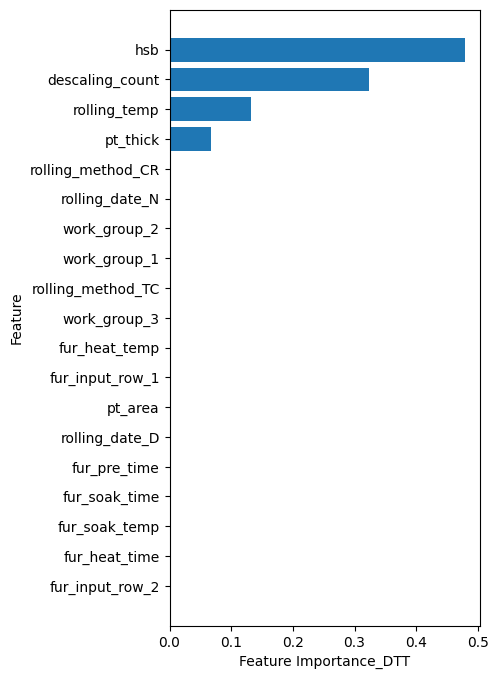

In [79]:
fig, ax = plt.subplots(figsize=(4, 8))

df_importanceDTT .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importanceDTT ))
plt.barh(y = coordinates, width = df_importanceDTT ["Importance"])
plt.yticks(coordinates, df_importanceDTT ["Feature"])
plt.xlabel("Feature Importance_DTT")
plt.ylabel("Feature")

plt.savefig('df_importanceDTT.png')


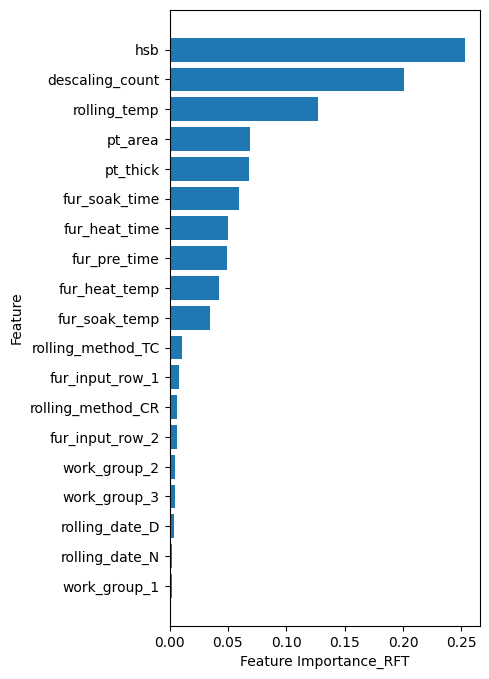

In [80]:
fig, ax = plt.subplots(figsize=(4, 8))

df_importanceRFT .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importanceRFT ))
plt.barh(y = coordinates, width = df_importanceRFT ["Importance"])
plt.yticks(coordinates, df_importanceRFT ["Feature"])
plt.xlabel("Feature Importance_RFT")
plt.ylabel("Feature")

plt.savefig('df_importanceRFT.png')

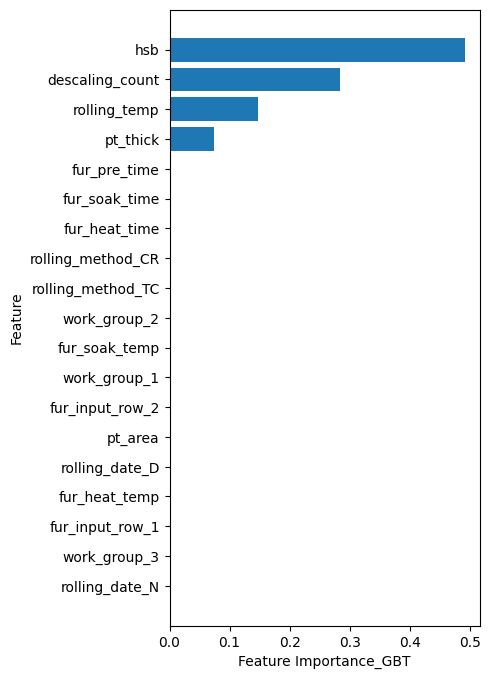

In [81]:
fig, ax = plt.subplots(figsize=(4, 8))

df_importanceGBT .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importanceGBT ))
plt.barh(y = coordinates, width = df_importanceGBT ["Importance"])
plt.yticks(coordinates, df_importanceGBT ["Feature"])
plt.xlabel("Feature Importance_GBT")
plt.ylabel("Feature")

plt.savefig('df_importanceGBT.png')

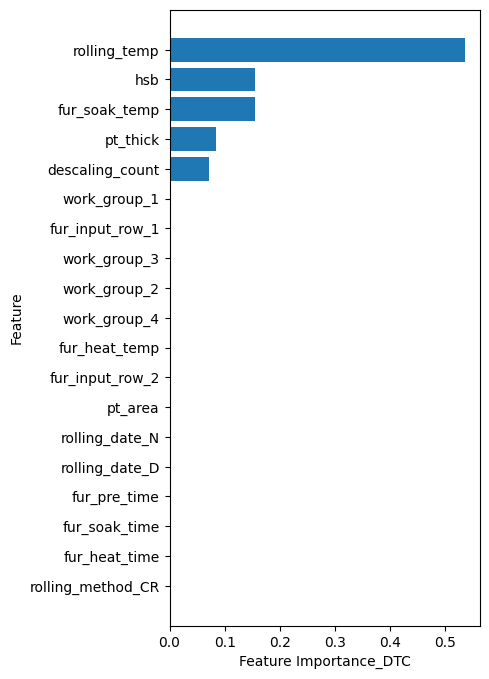

In [82]:
fig, ax = plt.subplots(figsize=(4, 8))

df_importanceDTC .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importanceDTC ))
plt.barh(y = coordinates, width = df_importanceDTC ["Importance"])
plt.yticks(coordinates, df_importanceDTC ["Feature"])
plt.xlabel("Feature Importance_DTC")
plt.ylabel("Feature")

plt.savefig('df_importanceDTC.png')

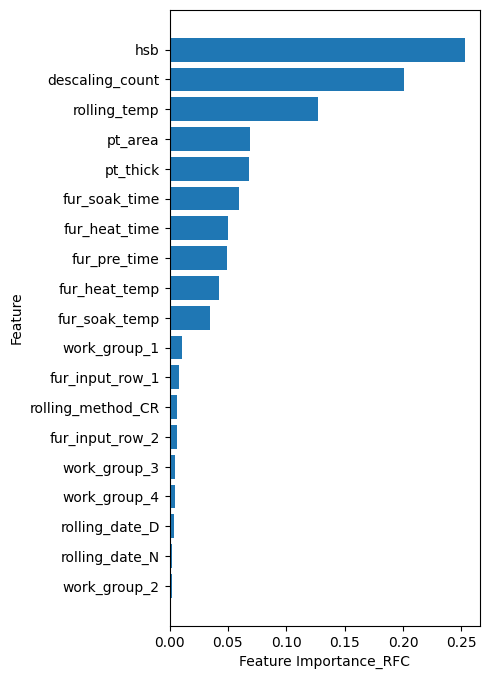

In [83]:
fig, ax = plt.subplots(figsize=(4, 8))

df_importanceRFC .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importanceRFC ))
plt.barh(y = coordinates, width = df_importanceRFC ["Importance"])
plt.yticks(coordinates, df_importanceRFC ["Feature"])
plt.xlabel("Feature Importance_RFC")
plt.ylabel("Feature")

plt.savefig('df_importanceRFC.png')

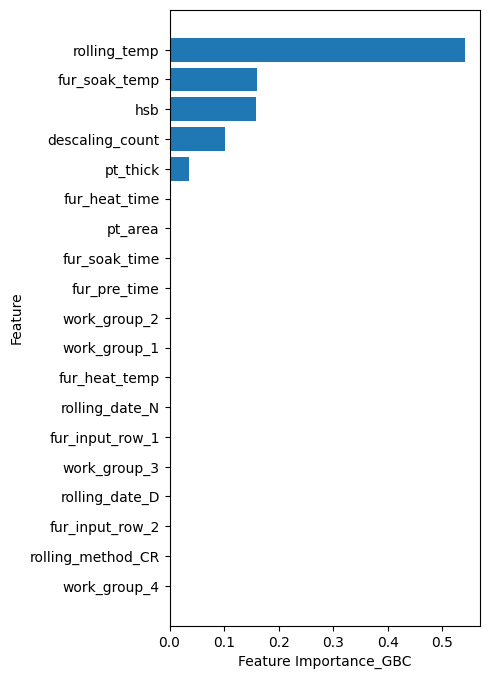

In [84]:
fig, ax = plt.subplots(figsize=(4, 8))

df_importanceGBC .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importanceGBC ))
plt.barh(y = coordinates, width = df_importanceGBC ["Importance"])
plt.yticks(coordinates, df_importanceGBC ["Feature"])
plt.xlabel("Feature Importance_GBC")
plt.ylabel("Feature")

plt.savefig('df_importanceGBC.png')